##Hand-written digits recognization


In [ ]:
#importing necessary lib

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
#importing the dataset from keras
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[17576].shape

(28, 28)

In [ ]:
print(x_test[23])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  69 152
  237 254 254 255 254 252  52   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  87 164 237 253 254
  218 138  83  39 154 254 135   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 138 246 253 254 216 167  54
    5   0   0   0 100 191   3   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 233 254 169  53   

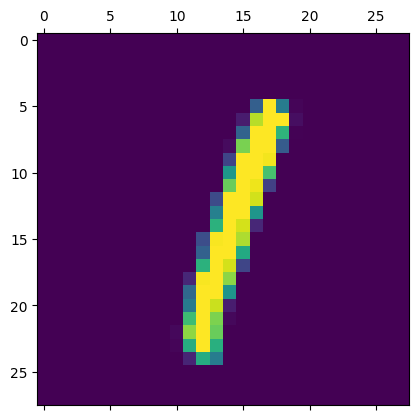

In [ ]:
plt.matshow(x_test[5])

In [ ]:
y_test[5]

np.uint8(1)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x_train.shape
#The output will be of 60000 images and each image dimentions of 28x28 grid value

(60000, 28, 28)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
#let flatten the array

x_train_flatten = x_train.reshape(len(x_train),28*28)
x_train_flatten.shape

(60000, 784)

In [ ]:
x_test_flatten = x_test.reshape(len(x_test),28*28)
x_test_flatten.shape

(10000, 784)

In [ ]:
#To create a simple input (784) and output layer(10) without hidden layer

model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
]
)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_flatten,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8072 - loss: 0.7284
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9148 - loss: 0.3052
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9216 - loss: 0.2832
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9239 - loss: 0.2704
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9244 - loss: 0.2687


In [ ]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9150 - loss: 0.3059


[0.27006253600120544, 0.9240000247955322]

In [ ]:
y_predict=model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_predict[7]

array([1.5860775e-06, 1.5309398e-01, 9.3214279e-03, 4.5278654e-02,
       2.4562082e-01, 1.5309064e-01, 2.1985807e-03, 2.1535568e-02,
       1.3981608e-01, 9.8206115e-01], dtype=float32)

In [ ]:
np.argmax(y_predict[7])

np.int64(9)

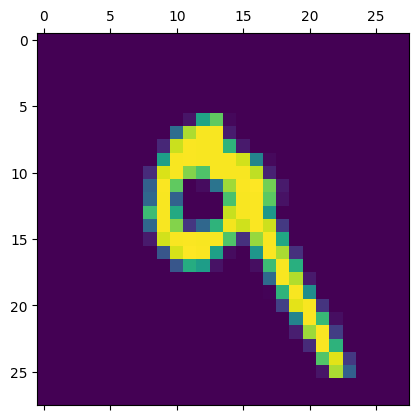

In [ ]:
plt.matshow(x_test[7]) #i can't plot graph on flatten array

In [ ]:
cn=tf.math.confusion_matrix(labels=y_test,predictions=np.argmax(y_predict, axis=1))
cn
#np.argmax is used to find the answer which is predicted of the form of output nodes to int value

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1109,    3,    3,    0,    1,    3,    2,   14,    0],
       [   8,    7,  909,   25,    7,    4,   12,   11,   44,    5],
       [   2,    0,   13,  940,    0,   12,    2,   12,   24,    5],
       [   1,    1,    2,    2,  911,    0,   13,    5,   12,   35],
       [   9,    2,    2,   55,   10,  744,   14,    9,   40,    7],
       [   9,    3,    6,    1,    7,    8,  919,    2,    3,    0],
       [   1,    5,   19,   10,    5,    0,    0,  952,    5,   31],
       [   6,    6,    6,   27,    9,   17,    9,   12,  876,    6],
       [  11,    5,    1,   12,   20,    4,    0,   30,    9,  917]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

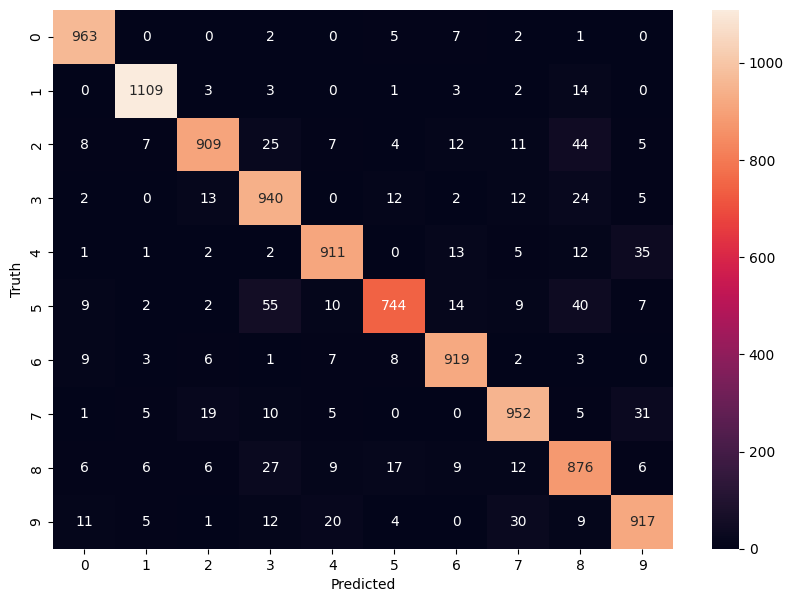

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#adding hidden layer

model=keras.Sequential([
    keras.layers.Dense(500,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
]
)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_flatten,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8985 - loss: 0.3416
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9741 - loss: 0.0849
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9845 - loss: 0.0493
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9894 - loss: 0.0339
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9922 - loss: 0.0239


In [ ]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9758 - loss: 0.0826


[0.0708758756518364, 0.9793000221252441]

In [ ]:
predictH = model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
np.argmax(predictH[3])

np.int64(0)

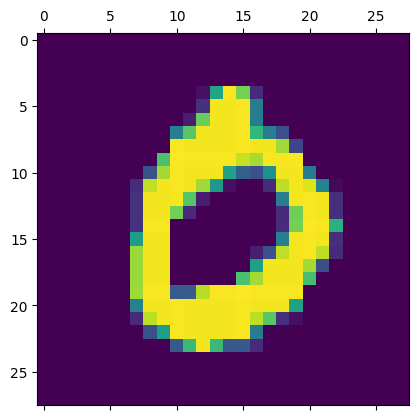

In [ ]:
plt.matshow(x_test[3])

In [ ]:
cn=tf.math.confusion_matrix(labels=y_test,predictions=np.argmax(predictH, axis=1))
cn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    1,    0,    1,    3,    3,    0,    2,    1],
       [   0, 1123,    2,    1,    0,    0,    2,    0,    7,    0],
       [   3,    2, 1009,    0,    3,    0,    4,    3,    7,    1],
       [   1,    0,    9,  981,    0,    9,    1,    2,    6,    1],
       [   1,    0,    1,    1,  964,    0,    4,    1,    2,    8],
       [   2,    0,    0,    9,    1,  872,    2,    0,    4,    2],
       [   2,    2,    0,    1,    6,    2,  943,    0,    2,    0],
       [   1,    6,   11,    1,    0,    0,    0,  998,    9,    2],
       [   2,    1,    3,    1,    3,    0,    1,    1,  961,    1],
       [   0,    3,    0,    2,    9,    5,    0,    7,    9,  974]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

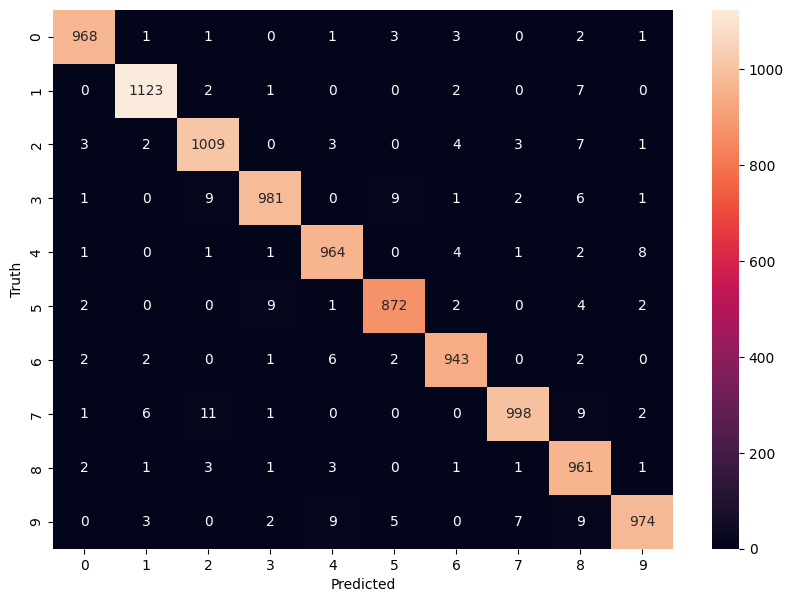

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#to avoid flatten variable we prefer:


model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
]
)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#model.fit(x_train_flatten,y_train,epochs=5)

model.fit(x_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9024 - loss: 0.3371
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9751 - loss: 0.0827
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9842 - loss: 0.0510
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9896 - loss: 0.0333
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9920 - loss: 0.0253


In [ ]:
predict=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9766 - loss: 0.0787


[0.06535504013299942, 0.9811000227928162]

In [ ]:
cn=tf.math.confusion_matrix(labels=y_test,predictions=np.argmax(predict, axis=1))
cn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    2,    1,    0,    0,    1,    1,    3,    0],
       [   0, 1130,    2,    1,    0,    1,    0,    0,    1,    0],
       [   0,    1, 1016,    3,    2,    0,    2,    6,    1,    1],
       [   0,    0,    6,  989,    0,    3,    1,    5,    1,    5],
       [   1,    2,    1,    0,  962,    0,    4,    0,    0,   12],
       [   3,    0,    0,    9,    1,  873,    2,    0,    3,    1],
       [   2,    2,    1,    2,    2,   14,  934,    1,    0,    0],
       [   2,    5,    9,    2,    2,    0,    0, 1003,    1,    4],
       [   1,    1,    3,   10,    4,    4,    1,    3,  941,    6],
       [   2,    2,    0,    2,    9,    2,    0,    0,    0,  992]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

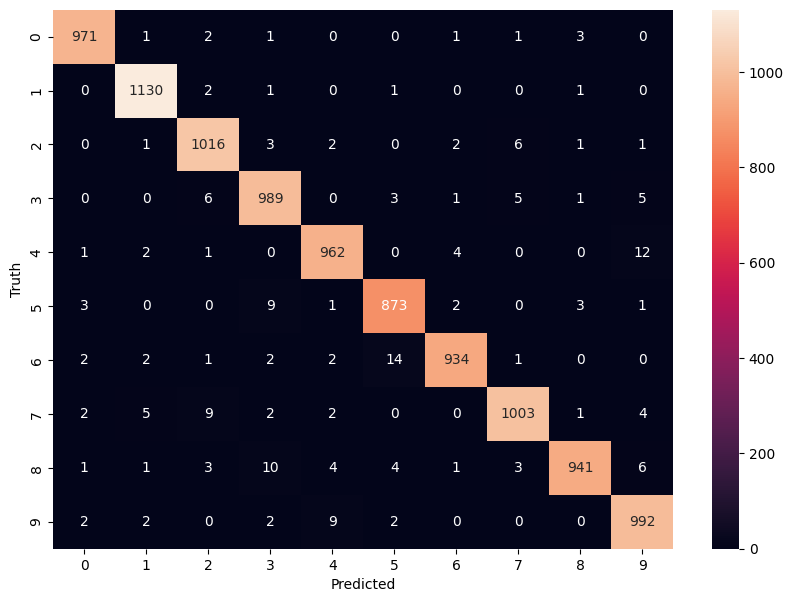

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')